In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [5]:
data = pd.read_csv("book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [ ]:
data["reviewText"][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [ ]:
data["reviewTextClean"] = data["reviewText"].str.lower()

In [ ]:
data["reviewTextClean"] = data["reviewTextClean"].apply(
    lambda x: re.sub(r"([^\w\s])", "", x)
)

In [9]:
data.head()

,index,reviewText,rating,reviewTextClean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [10]:
vader_analyzer = SentimentIntensityAnalyzer()

In [ ]:
data["vader_scores"] = data["reviewTextClean"].apply(
    lambda x: vader_analyzer.polarity_scores(x)["compound"]
)

In [12]:
data.head()

,index,reviewText,rating,reviewTextClean,vader_scores
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [ ]:
bins = [-1, -0.1, 0.1, 1]
labels = ["negative", "neutral", "positive"]
data["vader_sentiment"] = pd.cut(data["vader_scores"], bins=bins, labels=labels)

In [14]:
data.head()

,index,reviewText,rating,reviewTextClean,vader_scores,vader_sentiment
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment'>

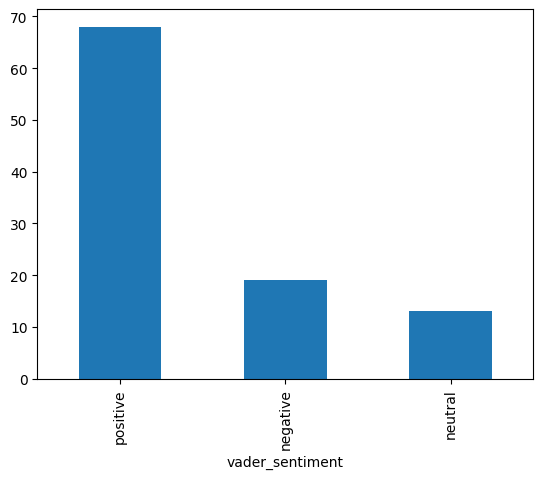

In [ ]:
data["vader_sentiment"].value_counts().plot.bar()

In [22]:
# transformers_pipeline = pipeline("sentiment-analysis")
# transformers_pipeline = pipeline(
#     "sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english"
# )
transformers_pipeline = pipeline(
    "sentiment-analysis", model="siebert/sentiment-roberta-large-english"
)

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use mps:0


In [23]:
transformers_labels = []
for review in data["reviewTextClean"].values:
    sentiment_list = transformers_pipeline(review)
    sentiment_label = [sent["label"] for sent in sentiment_list]
    transformers_labels.append(sentiment_label)

data["transformers_sentiment_label"] = transformers_labels

<Axes: xlabel='transformers_sentiment_label'>

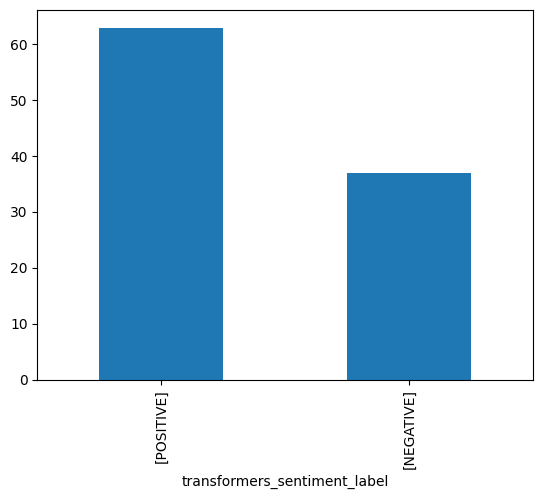

In [24]:
data["transformers_sentiment_label"].value_counts().plot.bar()